In [1]:
#!/usr/bin/env python3.6
# -*- coding: utf-8 -*-

In [2]:
# Imports
import sys
import joblib
import numpy as np
from matplotlib import animation
from IPython.display import HTML
from matplotlib import pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3

In [3]:
#np.random.seed(20)
np.set_printoptions(threshold=sys.maxsize)

In [4]:
%matplotlib inline

In [31]:
%store -r X_footsteps_accelerations_absolute
%store -r Y_footsteps_accelerations_absolute
print(X_footsteps_accelerations_absolute.shape)
print(Y_footsteps_accelerations_absolute.shape)

(7395, 20)
(7395, 4)


# Multivariate Linear Regression (Foot prediction)

In [32]:
import sklearn
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [33]:
# Entries where FL/RR are swinging
idxs = np.where(X_footsteps_accelerations_absolute[:, -2] == 1)[0]
X_footsteps_accelerations_absolute_RR_swing = X_footsteps_accelerations_absolute[idxs]
Y_footsteps_accelerations_absolute_RR_swing = Y_footsteps_accelerations_absolute[idxs]

## Predict FL foot -> x

In [34]:
X_footsteps_accelerations_absolute_RR_swing[0, :]

array([ 0.1       ,  0.        ,  0.        ,  0.08211927, -0.00619025,
        0.00489731,  0.23448798,  0.12098632, -0.31370604,  0.26968373,
       -0.13223646, -0.26779938, -0.25294316,  0.13706825, -0.27173775,
       -0.28294898, -0.12839869, -0.31333761,  1.        ,  0.        ])

In [35]:
Y_footsteps_accelerations_absolute_RR_swing[0, :]

array([ 0.0592235 ,  0.01086388,  0.05407919, -0.01027362])

### Linear Regression

In [36]:
def find_best_model(X, Y, runs=1000):
    best_model = None
    lowest_error = 100
    best_Xtr, best_Xte, best_Ytr, best_Yte = None, None, None, None
    
    for _ in range(runs):
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.9, shuffle=True)
        
        model = LinearRegression()
        model.fit(X_train, Y_train)

        predictions = model.predict(X_test)
        error = np.max(np.abs(predictions - Y_test))

        if error < lowest_error:
            best_model = model
            lowest_error = error
            best_Xtr, best_Xte, best_Ytr, best_Yte = X_train, X_test, Y_train, Y_test

    # Stats
    predictions = best_model.predict(best_Xte)
    print('R2: ', r2_score(predictions, best_Yte))
    print('RMSE: ', np.sqrt(mean_squared_error(best_Yte, predictions)))
    print("The lowest error is: ", np.min(np.abs(predictions - best_Yte)))
    print("The highest error is: ", np.max(np.abs(predictions - best_Yte)))
    print("The avg. error is: ", np.mean(np.abs(predictions - best_Yte)))
    
    return best_Xte, best_Yte, predictions, best_model

In [38]:
# Input
X = np.hstack((X_footsteps_accelerations_absolute_RR_swing[:, 0:1], # current reference velocity
               X_footsteps_accelerations_absolute_RR_swing[:, 3:4], # actual velocity
               X_footsteps_accelerations_absolute_RR_swing[:, 6:8], # FL position
               X_footsteps_accelerations_absolute_RR_swing[:, 9:11], # FR position
               X_footsteps_accelerations_absolute_RR_swing[:, 12:14], # RL position
               X_footsteps_accelerations_absolute_RR_swing[:, 15:17])) # RR position

# Labels
Y = np.array([Y_footsteps_accelerations_absolute_RR_swing[:, 0]]).T

assert Y.shape[0] == X.shape[0]

# Split dataset and fit best model
X_test, Y_test, predictions, model_rr_relative_swinging_x = find_best_model(X, Y, runs=5000)

R2:  0.9896564183436621
RMSE:  0.016191876972210577
The lowest error is:  0.00015784331563047094
The highest error is:  0.04261550099386313
The avg. error is:  0.01228621496538612


In [39]:
model_rr_relative_swinging_x.coef_

array([[ 0.30095437,  0.36495406, -1.19617554,  1.0090218 , -0.25595662,
        -0.14493067, -0.48013734,  0.55613858,  0.70169383, -0.98955507]])

In [40]:
model_rr_relative_swinging_x.intercept_

array([0.07811534])

Text(0, 0.5, 'Predictions')

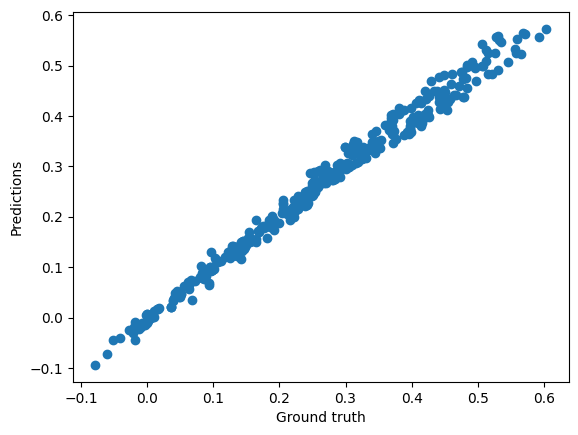

In [41]:
## The line / model
plt.scatter(Y_test, predictions)
plt.xlabel("Ground truth")
plt.ylabel("Predictions")

In [42]:
#for idx, prediction in enumerate(predictions):
#    print(f'Start: {X_test[idx, 6]}. Groundtruth: {Y_test[idx]}. Predicted: {prediction}')

### Predict RR foot -> y

In [ ]:
# Input
X = np.hstack((X_footsteps_accelerations_absolute_RR_swing[:, 0:1], # current reference velocity
               X_footsteps_accelerations_absolute_RR_swing[:, 3:4], # actual velocity
               X_footsteps_accelerations_absolute_RR_swing[:, 6:8], # FL position
               X_footsteps_accelerations_absolute_RR_swing[:, 9:11], # FR position
               X_footsteps_accelerations_absolute_RR_swing[:, 12:14], # RL position
               X_footsteps_accelerations_absolute_RR_swing[:, 15:17])) # RR position

# Labels
Y = np.array([Y_footsteps_accelerations_absolute_RR_swing[:, 1]]).T

assert Y.shape[0] == X.shape[0]

# Split dataset and fit best model
X_test, Y_test, predictions, model_rr_relative_swinging_y = find_best_model(X, Y, runs=5000)

R2:  0.8861018852788
RMSE:  0.004796827847088972
The lowest error is:  4.370734572850532e-06
The highest error is:  0.013108839991046513
The avg. error is:  0.0036967587593717023


In [ ]:
model_rr_relative_swinging_y.coef_

array([[-0.04434898, -0.00771166,  0.07051247, -1.07733049, -0.56825544,
         0.0163967 ,  0.71544876,  0.55445835, -0.1263772 ,  0.14038913]])

In [ ]:
model_rr_relative_swinging_y.intercept_

array([0.37286927])

Text(0, 0.5, 'Predictions')

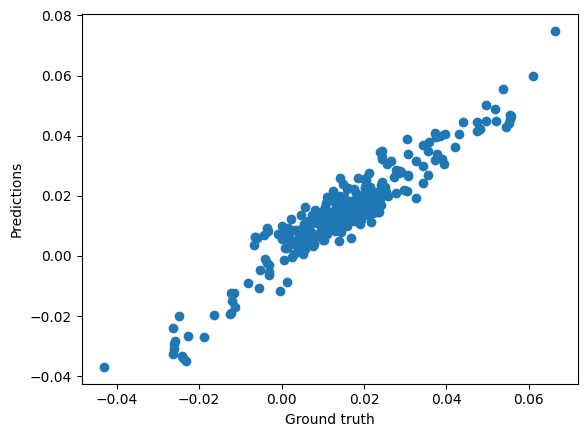

In [ ]:
## The line / model
plt.scatter(Y_test, predictions)
plt.xlabel("Ground truth")
plt.ylabel("Predictions")

In [ ]:
#for idx, prediction in enumerate(predictions):
#    print(f'Input: {X_test[idx]}. Groundtruth: {Y_test[idx]}. Predicted: {prediction}')